# COMP SCI 760 - HomeWork 3
## Submitted by - Suyash Raj (ID - 90860122844)
---

# 2. Programming

## 2.1)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def readD2ZData(file):
    df = pd.read_csv(file, sep=' ', header=None)
    x_df = df.loc[:, :1]
    y_df = df.loc[:, 2:]
    x_train, y_train = x_df.values.tolist(), y_df.values.tolist()

    return x_train, y_train

In [2]:
x_train, y_train = readD2ZData('data/D2z.txt')

In [3]:
x, y = np.array(x_train), np.array(y_train)
x_1, x_2 = x[:, 0], x[:, 1]
y = np.ndarray.flatten(y)

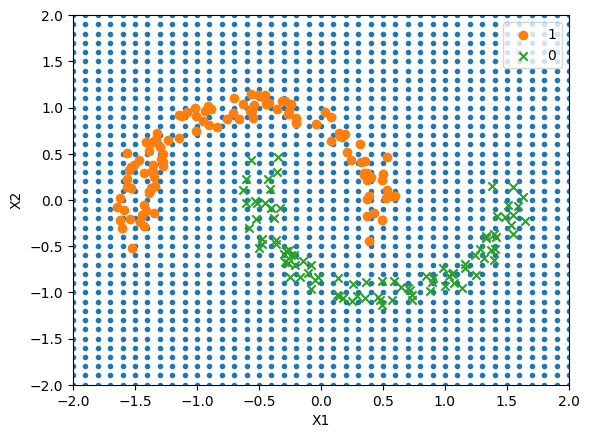

In [4]:
lab_neg_idx = [i for i in range(len(y)) if y[i]==0]
lab_pos_idx = [i for i in range(len(y)) if y[i]==1]

x_1_neg = [x_1[i] for i in lab_neg_idx]
x_1_pos = [x_1[i] for i in lab_pos_idx]
x_2_neg = [x_2[i] for i in lab_neg_idx]
x_2_pos = [x_2[i] for i in lab_pos_idx]

grid_ax_vals = np.arange(-2, 2.1, 0.1)
grid_count = grid_ax_vals.size
grid_x = np.array([[val]*grid_count for val in grid_ax_vals]).flatten()
grid_y = np.array([grid_ax_vals] * grid_count).flatten()

plt.scatter(grid_x, grid_y, marker='.')
plt.scatter(x_1_pos, x_2_pos, marker='o', label="1")
plt.scatter(x_1_neg, x_2_neg, marker='x', label="0")
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc="upper right")
plt.show()

---
# SPAM FILTER

In [2]:
## Read emails.csv
df = pd.read_csv('data\emails.csv', sep=',')
x = df.iloc[:, 1:-1].to_numpy()
y = df.iloc[:, -1:].to_numpy()
print("X shape: ", x.shape, "\nY shape: ", y.shape)

X shape:  (5000, 3000) 
Y shape:  (5000, 1)


In [3]:
def calculate_euclidean_dist(a, b):
    dist = 0
    for i in range(a.shape[0]):
        dist += ((a[i]-b[i])**2)
    return dist**0.5

In [81]:
import time
def knn_classify(point, x_train, y_train, k):
    N = x_train.shape[0]
    dist = np.linalg.norm((x_train - point), ord=2, axis=1)  

    ## Get indices for k shortest distances
    indices = np.argpartition(dist, k)[:k]
    k_labels = y[indices].flatten()
    y_hat, c = np.unique(k_labels, return_counts=True)
    if len(c) == 1:
        return y_hat[0], 1
    if c[0] > c[1]:
        return y_hat[0], (c[0]/(c[0] + c[1]))
    else:
        return y_hat[1], (c[1]/(c[0] + c[1]))

In [46]:
def knn_classify_set(points, x_train, y_train, k):
    return np.array([knn_classify(point, x_train, y_train, k)[0] for point in points])

In [6]:
def calculate_accuracy(y_hat, y):
    N = y_hat.size
    correct = 0
    
    for i in range(N):
        if y_hat[i] == y[i]:
            correct += 1
    return correct/N

In [7]:
def calculate_precision(y_hat, y):
    tp, fp = 0, 0
    for i in range(y_hat.size):
        if y_hat[i] == 1 and y[i] == 1:
            tp += 1
        elif y_hat[i] == 1 and y[i] == 0:
            fp += 1
    return tp/(tp+fp)

In [8]:
def calculate_recall(y_hat, y):
    tp, fn = 0, 0
    for i in range(y_hat.size):
        if y_hat[i] == 1 and y[i] == 1:
            tp += 1
        elif y_hat[i] == 0 and y[i] == 1:
            fn += 1
    return tp/(tp+fn)

## 2.2)

In [12]:
for fold in range(5):
    a, b = fold*1000, (fold+1)*1000
    x_train, y_train = np.concatenate((x[:a], x[b:]), axis=0), np.concatenate((y[:a], y[b:]), axis=0)
    x_test, y_test = x[a:b], y[a:b]
    y_hat = knn_classify_set(x_test, x_train, y_train, 1)
    print("Fold ", (fold+1))
    print("Accuracy: ", calculate_accuracy(y_hat, y_test))
    print("Precision: ", calculate_precision(y_hat, y_test))
    print("Recall: ", calculate_recall(y_hat, y_test))
    print("----------------------------------------------------------")

Fold  1
Accuracy:  0.586
Precision:  0.2768166089965398
Recall:  0.2807017543859649
----------------------------------------------------------
Fold  2
Accuracy:  0.729
Precision:  0.5113636363636364
Recall:  0.48736462093862815
----------------------------------------------------------
Fold  3
Accuracy:  0.755
Precision:  0.5619047619047619
Recall:  0.6232394366197183
----------------------------------------------------------
Fold  4
Accuracy:  0.751
Precision:  0.5688073394495413
Recall:  0.6326530612244898
----------------------------------------------------------
Fold  5
Accuracy:  0.775
Precision:  0.6057441253263708
Recall:  0.7581699346405228
----------------------------------------------------------


## 2.3)

In [90]:
import scipy

class LogisticRegression:

    def __init__(self, lr):
        self.learning_rate = lr
        self.weights = None
        self.bias = None

    def sigmoid(self, x):
        return scipy.special.expit(x)

    def get_loss(self, y, y_hat):
        loss_y_0 = y * np.log(y_hat + 1e-12)
        loss_y_1 = (1-y) * np.log(1 - y_hat + 1e-12)
        loss = -np.mean(loss_y_0 + loss_y_1)
        return loss

    def calculate_gradients(self, tx, ty, y_hat):
        # print("y_hat shape: ", y_hat.shape)
        # print("y shape: ", ty.shape)
        diff = y_hat - ty
        # print("diff shape: ", diff.shape)
        grad_b = np.mean(diff)
        # print("tx shape: ", tx.shape)
        # print("diff shape: ", diff.shape)
        grad_w = tx * np.repeat(np.reshape(diff, (4000, 1)), 3000, axis=1)
        # print("grad w shape ", grad_w.shape)
        grad_w = np.mean(grad_w, axis=0)
        # print("grad w shape: ", grad_w.shape)
        #grad_w = np.array([np.mean(grad) for grad in grad_w])

        return grad_w, grad_b

    def update_params(self, error_w, error_b):
        self.weights = self.weights - (self.learning_rate * error_w)
        self.bias = self.bias - (self.learning_rate * error_b)

    def fit(self, x_train, y_train, epochs):
        self.weights = np.zeros(x.shape[1])
        self.bias = 0

        for i in range(epochs):
            #print("Training for epoch: ", i)
            x_dot_w = np.matmul(self.weights, x_train.T) + self.bias
            pred = self.sigmoid(x_dot_w)
            loss = self.get_loss(y_train, pred)
            # print("pred shape: ", pred.shape)
            dw, db = self.calculate_gradients(x_train, y_train.flatten(), pred)
            self.update_params(dw, db)

    def predict(self, tx):
        # print("shape of weights: ", self.weights.shape)
        # print("shape of x: ", tx.shape)
        x_dot_w = np.matmul(self.weights, tx.T) + self.bias
        probs = self.sigmoid(x_dot_w)
        return np.where(probs>0.5, 1, 0), probs

In [169]:
for fold in range(5):
    a, b = fold*1000, (fold+1)*1000
    x_train, y_train = np.concatenate((x[:a], x[b:]), axis=0), np.concatenate((y[:a], y[b:]), axis=0)
    x_test, y_test = x[a:b], y[a:b]
    log_reg = LogisticRegression(0.0001)
    log_reg.fit(x_train, y_train, 500)
    y_hat, _ = log_reg.predict(x_test)
    print("Fold ", (fold+1))
    print("Accuracy: ", calculate_accuracy(y_hat, y_test))
    print("Precision: ", calculate_precision(y_hat, y_test))
    print("Recall: ", calculate_recall(y_hat, y_test))
    print("----------------------------------------------------------")

Fold  1
Accuracy:  0.861
Precision:  0.8230088495575221
Recall:  0.6526315789473685
----------------------------------------------------------
Fold  2
Accuracy:  0.837
Precision:  0.7740384615384616
Recall:  0.5812274368231047
----------------------------------------------------------
Fold  3
Accuracy:  0.843
Precision:  0.8432432432432433
Recall:  0.5492957746478874
----------------------------------------------------------
Fold  4
Accuracy:  0.826
Precision:  0.7777777777777778
Recall:  0.5714285714285714
----------------------------------------------------------
Fold  5
Accuracy:  0.755
Precision:  0.6355555555555555
Recall:  0.4673202614379085
----------------------------------------------------------


# 2.4)

In [16]:
ks = [1, 3, 5, 7, 10]
avg_accuracies = [0, 0, 0, 0, 0]

for i in range(len(ks)):
    k = ks[i]
    sum_accuracies = 0
    for fold in range(5):
        a, b = fold*1000, (fold+1)*1000
        x_train, y_train = np.concatenate((x[:a], x[b:]), axis=0), np.concatenate((y[:a], y[b:]), axis=0)
        x_test, y_test = x[a:b], y[a:b]
        y_hat = knn_classify_set(x_test, x_train, y_train, k)
        accuracy = calculate_accuracy(y_hat, y_test)
        sum_accuracies += accuracy
    avg_accuracies[i] = sum_accuracies/5
    print("k = ", k, "; average accuracy: ", avg_accuracies[i])

k =  1 ; average accuracy:  0.7192
k =  3 ; average accuracy:  0.7514000000000001
k =  5 ; average accuracy:  0.764
k =  7 ; average accuracy:  0.7737999999999999
k =  10 ; average accuracy:  0.7712000000000001


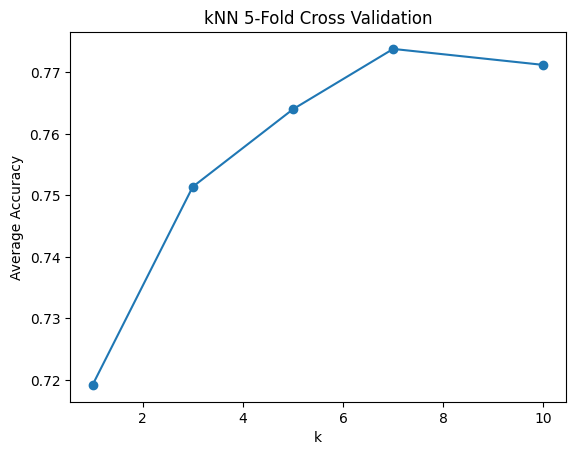

In [20]:
import matplotlib.pyplot as plt

plt.plot(ks, avg_accuracies, marker='o')
plt.xlabel('k')
plt.ylabel('Average Accuracy')
plt.title('kNN 5-Fold Cross Validation')
plt.show()

## 2.5)

In [21]:
a, b = 1*1000, (1+1)*1000
x_train, y_train = np.concatenate((x[:a], x[b:]), axis=0), np.concatenate((y[:a], y[b:]), axis=0)
x_test, y_test = x[a:b], y[a:b]

In [86]:
y_hat_knn, y_hat_knn_probs = np.array([knn_classify(point, x_train, y_train, 5)[0] for point in x_test]), np.array([knn_classify(point, x_train, y_train, 5)[1] for point in x_test])

In [91]:
log_reg = LogisticRegression(0.0001)
log_reg.fit(x_train, y_train, 500)
y_hat_lr, y_hat_lr_probs = log_reg.predict(x_test)

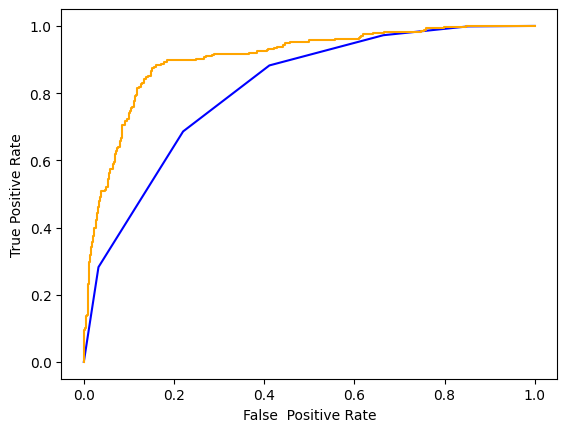

In [110]:
from sklearn.metrics import roc_curve

knn_probs = np.array([y_hat_knn_probs[i] if y_hat_knn[i] == y_test[i] else (1 - y_hat_knn_probs[i]) for i in range(len(y_test))])

fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_probs)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_hat_lr_probs)
plt.plot(tpr_knn, fpr_knn, label='KNeighborsClassifier', color='blue')
plt.plot(fpr_lr, tpr_lr, label='LogisticRegression', color='orange')
plt.xlabel('False  Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()